# Download
First we need to download all files from the server and combine them into a single dataframe

In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev, median
import statsmodels.api as sm
from statsmodels.formula.api import ols


files = os.listdir('data')
df = pd.concat([pd.read_csv('data/' + file) for file in files if 'part' in file], ignore_index=True)
print(df.head())

   participant_id     timestamp  time_to_finish     ui_mode environment  \
0              10  1.741882e+12          2217.0  light_mode    dark_env   
1              10  1.741882e+12         18175.0  light_mode    dark_env   
2              10  1.741882e+12          1824.0  light_mode    dark_env   
3              10  1.741882e+12          2432.0  light_mode    dark_env   
4              10  1.741882e+12          7440.0  light_mode    dark_env   

  fill_character outlier_character  trial  trial_combined  
0              o                 e    1.0             1.0  
1              0                 8    2.0             2.0  
2              v                 u    3.0             3.0  
3              T                 7    4.0             4.0  
4              e                 o    5.0             5.0  


# Mean times for each setting

In [53]:
mean_time_to_finish_dark_mode = df[df["ui_mode"] == "dark_mode"]["time_to_finish"].mean()
mean_time_to_finish_light_mode = df[df['ui_mode'] == 'light_mode']['time_to_finish'].mean()
mean_time_to_finish_combined = df['time_to_finish'].mean()

median_time_to_finish_dark_mode = df[df["ui_mode"] == "dark_mode"]["time_to_finish"].median()
median_time_to_finish_light_mode = df[df['ui_mode'] == 'light_mode']['time_to_finish'].median()
median_time_to_finish_combined = df['time_to_finish'].median()

print(mean_time_to_finish_dark_mode)
print(mean_time_to_finish_light_mode)
print(mean_time_to_finish_combined)

print(median_time_to_finish_dark_mode)
print(median_time_to_finish_light_mode)
print(median_time_to_finish_combined)

10382.540145985402
6707.7653806047965
8545.152763295098
4945.0
3496.0
4084.0


Text(0, 0.5, 'Times')

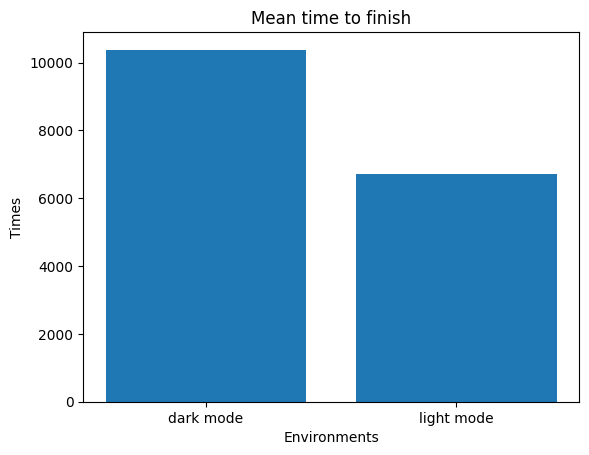

In [54]:
visualization = plt.bar(['dark mode', 'light mode'],[mean_time_to_finish_dark_mode, mean_time_to_finish_light_mode])
plt.title('Mean time to finish')
plt.xlabel('Environments')
plt.ylabel('Times')

In [55]:
mean_time_to_finish_dark_mode_dark_env = df[(df["ui_mode"] == "dark_mode") & (df['environment'] == 'dark_env')]["time_to_finish"].mean()
mean_time_to_finish_light_mode_light_env = df[(df['ui_mode'] == 'light_mode') & (df['environment'] == 'light_env')]['time_to_finish'].mean()
mean_time_to_finish_dark_mode_light_env = df[(df["ui_mode"] == "dark_mode") & (df['environment'] == 'light_env')]["time_to_finish"].mean()
mean_time_to_finish_light_mode_dark_env = df[(df['ui_mode'] == 'light_mode') & (df['environment'] == 'dark_env')]['time_to_finish'].mean()

modes_with_environments = [mean_time_to_finish_dark_mode_dark_env, mean_time_to_finish_dark_mode_light_env, mean_time_to_finish_light_mode_light_env, mean_time_to_finish_light_mode_dark_env]

print(modes_with_environments)

[np.float64(10530.016666666666), np.float64(10234.755741127348), np.float64(6870.9), np.float64(6544.290187891441)]


Text(0, 0.5, 'Times')

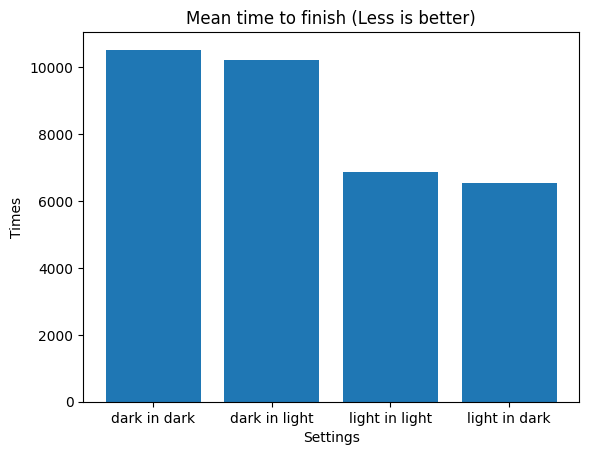

In [56]:
visualization = plt.bar(['dark in dark', 'dark in light', 'light in light', 'light in dark'], modes_with_environments)
plt.title('Mean time to finish (Less is better)')
plt.xlabel('Settings')
plt.ylabel('Times')

In [57]:
ttf_o_e = df[(df["fill_character"] == "o") | (df['outlier_character'] == 'o')]["time_to_finish"].mean()
ttf_0_8 = df[(df["fill_character"] == "0") | (df['outlier_character'] == '0')]["time_to_finish"].mean()
ttf_v_u = df[(df["fill_character"] == "v") | (df['outlier_character'] == 'v')]["time_to_finish"].mean()
ttf_7_T = df[(df["fill_character"] == "7") | (df['outlier_character'] == '7')]["time_to_finish"].mean()

filler_outlier_means = [ttf_o_e, ttf_0_8, ttf_v_u, ttf_7_T]
print(filler_outlier_means)

[np.float64(6954.634655532359), np.float64(17393.535714285714), np.float64(4968.738045738046), np.float64(4956.529045643154)]


Text(0, 0.5, 'Times')

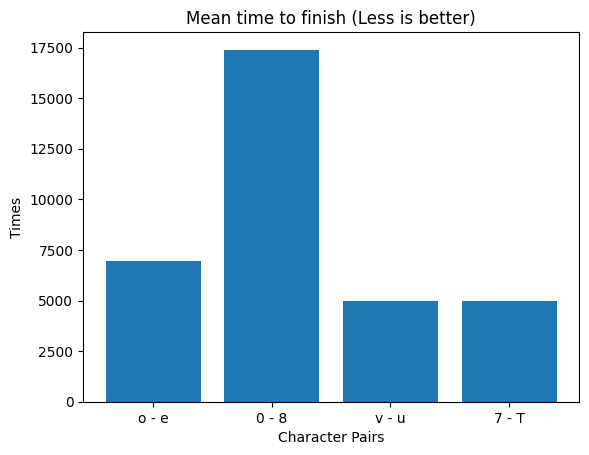

In [58]:
visualization = plt.bar(['o - e', '0 - 8', 'v - u', '7 - T'], filler_outlier_means)
plt.title('Mean time to finish (Less is better)')
plt.xlabel('Character Pairs')
plt.ylabel('Times')

In [59]:
mean_time_to_finish_dark_env = df[df["environment"] == "dark_env"]["time_to_finish"].mean()
mean_time_to_finish_light_env = df[df['environment'] == 'light_env']['time_to_finish'].mean()
means = [mean_time_to_finish_dark_env, mean_time_to_finish_light_env]
print(means)

[np.float64(8539.231491136601), np.float64(8551.074035453597)]


Text(0, 0.5, 'Times')

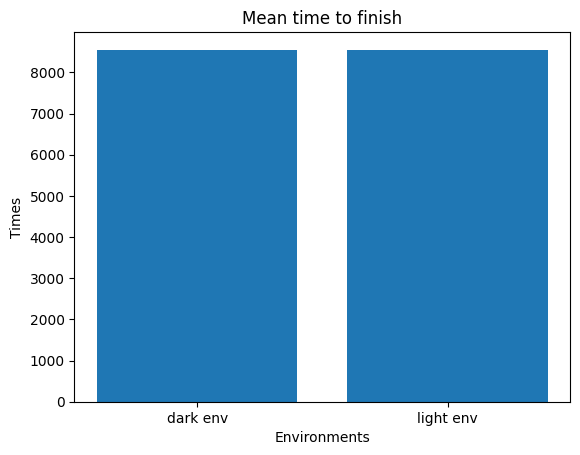

In [60]:

visualization = plt.bar(['dark env', 'light env'],[mean_time_to_finish_dark_env, mean_time_to_finish_light_env])
plt.title('Mean time to finish')
plt.xlabel('Environments')
plt.ylabel('Times')

In [61]:
times_per_participant = []

for i in range(len(files)):
    curr = i + 3 # 1 and 2 excluded
    

In [62]:
median_time_to_finish_dark_mode_dark_env = df[(df["ui_mode"] == "dark_mode") & (df['environment'] == 'dark_env')]["time_to_finish"].median()
median_time_to_finish_light_mode_light_env = df[(df['ui_mode'] == 'light_mode') & (df['environment'] == 'light_env')]['time_to_finish'].median()
median_time_to_finish_dark_mode_light_env = df[(df["ui_mode"] == "dark_mode") & (df['environment'] == 'light_env')]["time_to_finish"].median()
median_time_to_finish_light_mode_dark_env = df[(df['ui_mode'] == 'light_mode') & (df['environment'] == 'dark_env')]['time_to_finish'].median()

modes_with_environments = [median_time_to_finish_dark_mode_dark_env, median_time_to_finish_dark_mode_light_env, median_time_to_finish_light_mode_light_env, median_time_to_finish_light_mode_dark_env]

print(modes_with_environments)

[np.float64(5669.0), np.float64(4568.0), np.float64(3655.5), np.float64(3296.0)]


In [63]:
t_med_darkmode = df[df['ui_mode'] == 'dark_mode']['time_to_finish'].median()
t_med_lightmode = df[df['ui_mode'] == 'light_mode']['time_to_finish'].median()

t_med_darkenv = df[df['environment'] == 'dark_env']['time_to_finish'].median()
t_med_lightenv = df[df['environment'] == 'light_env']['time_to_finish'].median()

t_med_combined = df['time_to_finish'].median()

print(t_med_darkmode)
print(t_med_lightmode)
print(t_med_darkenv)
print(t_med_lightenv)
print(t_med_combined)

4945.0
3496.0
4136.0
4008.0
4084.0


In [64]:
with open('data/StudyResults.tsv', 'r') as tsvfile:
    content = tsvfile.read()
    content = content.replace('\t', ',')
    with open ('data/eye_tracking_data.csv', 'w') as csvfile:
        csvfile.write(content)
        

In [65]:
df_eye =  pd.read_csv('data/eye_tracking_data.csv')
print(df_eye)

      Recording Participant               TOI  Interval  Duration_of_interval  \
0    Recording3          P3       DarkE_DarkM         1                496616   
1    Recording3          P3      DarkE_LightM         1                286346   
2    Recording3          P3      LightE_DarkM         1                418157   
3    Recording3          P3     LightE_LightM         1                251484   
4    Recording3          P3  Entire Recording         1               1778677   
5    Recording4          P4       DarkE_DarkM         1                538828   
6    Recording4          P4      DarkE_LightM         1                312153   
7    Recording4          P4      LightE_DarkM         1                493769   
8    Recording4          P4     LightE_LightM         1                276336   
9    Recording4          P4  Entire Recording         1               2081093   
10   Recording5          P5       DarkE_DarkM         1                467704   
11   Recording5          P5 

In [66]:
df_eye['interval_seconds'] = df_eye['Duration_of_interval'] / 1000
df_eye['interval_minutes'] = (df_eye['Duration_of_interval'] / 1000) / 60

In [67]:
print(df_eye)

      Recording Participant               TOI  Interval  Duration_of_interval  \
0    Recording3          P3       DarkE_DarkM         1                496616   
1    Recording3          P3      DarkE_LightM         1                286346   
2    Recording3          P3      LightE_DarkM         1                418157   
3    Recording3          P3     LightE_LightM         1                251484   
4    Recording3          P3  Entire Recording         1               1778677   
5    Recording4          P4       DarkE_DarkM         1                538828   
6    Recording4          P4      DarkE_LightM         1                312153   
7    Recording4          P4      LightE_DarkM         1                493769   
8    Recording4          P4     LightE_LightM         1                276336   
9    Recording4          P4  Entire Recording         1               2081093   
10   Recording5          P5       DarkE_DarkM         1                467704   
11   Recording5          P5 

In [68]:
df_eye['blinks_per_minute'] = df_eye['Number_of_blinks'] / df_eye['interval_minutes']

In [69]:
print(df_eye)

      Recording Participant               TOI  Interval  Duration_of_interval  \
0    Recording3          P3       DarkE_DarkM         1                496616   
1    Recording3          P3      DarkE_LightM         1                286346   
2    Recording3          P3      LightE_DarkM         1                418157   
3    Recording3          P3     LightE_LightM         1                251484   
4    Recording3          P3  Entire Recording         1               1778677   
5    Recording4          P4       DarkE_DarkM         1                538828   
6    Recording4          P4      DarkE_LightM         1                312153   
7    Recording4          P4      LightE_DarkM         1                493769   
8    Recording4          P4     LightE_LightM         1                276336   
9    Recording4          P4  Entire Recording         1               2081093   
10   Recording5          P5       DarkE_DarkM         1                467704   
11   Recording5          P5 

In [70]:
blinks_dark_in_dark = df_eye[(df_eye['TOI'] == 'DarkE_DarkM') & (df_eye['blinks_per_minute'] != 0)]['blinks_per_minute'].mean()
blinks_dark_in_light = df_eye[(df_eye['TOI'] == 'LightE_DarkM') & (df_eye['blinks_per_minute'] != 0)]['blinks_per_minute'].mean()

blinks_light_in_dark = df_eye[(df_eye['TOI'] == 'DarkE_LightM') & (df_eye['blinks_per_minute'] != 0)]['blinks_per_minute'].mean()
blinks_light_in_light = df_eye[(df_eye['TOI'] == 'LightE_LightM') & (df_eye['blinks_per_minute'] != 0)]['blinks_per_minute'].mean()

blink_rates = [blinks_dark_in_dark, blinks_dark_in_light, blinks_light_in_light, blinks_light_in_dark]

print(blink_rates)

[np.float64(12.709235753079701), np.float64(10.480040294574556), np.float64(10.993772055067707), np.float64(10.443404075852781)]


In [ ]:
# ----- Load your data (replace with your actual loading code) -----
df_tasks = df
df_blinks = df_eye

# For example purposes, assume your DataFrames are already named:
# df_tasks and df_blinks

# --- Preprocessing task data ---
df_tasks_clean = df_tasks[["participant_id", "time_to_finish", "ui_mode", "environment"]].copy()
df_tasks_clean["participant_id"] = df_tasks_clean["participant_id"].astype(str)

# --- Preprocessing blink data ---
# Assume Recording names like "DarkE_DarkM" => parse them
def parse_condition(row):
    env, ui = row["TOI"].split("_")
    return pd.Series({"environment": env.lower() + "_env", "ui_mode": ui.lower() + "_mode"})

df_blinks_clean = df_blinks.copy()
df_blinks_clean = df_blinks_clean.join(df_blinks_clean.apply(parse_condition, axis=1))
df_blinks_clean.rename(columns={
    "Participant": "participant_id",
    "blinks_per_minute": "blinks_per_minute"
}, inplace=True)
df_blinks_clean["participant_id"] = df_blinks_clean["participant_id"].str.replace("P", "")

# Ensure participant_id is string for merging
df_blinks_clean["participant_id"] = df_blinks_clean["participant_id"].astype(str)

# --- Merge data ---
merged_df = pd.merge(df_tasks_clean, df_blinks_clean[["participant_id", "blinks_per_minute", "environment", "ui_mode"]], 
                     on=["participant_id", "environment", "ui_mode"], 
                     how="inner")

# --- ANOVA for time_to_finish ---
print("=== ANOVA: Task Completion Time ===")
model1 = ols("time_to_finish ~ C(ui_mode) * C(environment)", data=merged_df).fit()
anova1 = sm.stats.anova_lm(model1, typ=2)
print(anova1)

# --- ANOVA for blink rate ---
print("\n=== ANOVA: Blink Rate ===")
model2 = ols("blinks_per_minute ~ C(ui_mode) * C(environment)", data=merged_df).fit()
anova2 = sm.stats.anova_lm(model2, typ=2)
print(anova2)